In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [20]:
rng = np.random.default_rng(10)

def generate_data(mean, std, n, beta0, beta1, beta2) -> pd.DataFrame:
    X1 = rng.uniform(mean, std, size=n)
    X2 = 0.5 * X1 + rng.normal(size=n) / 10
    EPS = rng.normal(0, 1, size=n)
    Y = beta0 + beta1 * X1 + beta2 * X2 + EPS

    data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y, 'EPS': EPS})

    return data

def fit_model(model_formula: str, data: pd.DataFrame) -> sm.regression.linear_model.RegressionResultsWrapper:
    model = smf.ols(model_formula, data).fit()
    return model

def plot_results(X, Y, title):
    plt.scatter(X, Y, label='Data points')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

X1 and X2 correlation: 0.772324497691354


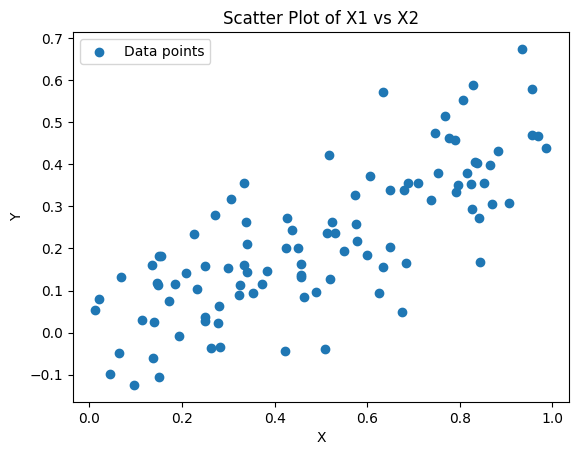

In [21]:
data1 = generate_data(mean=0, std=1, n=100, beta0=2, beta1=2, beta2=0.3)

print("X1 and X2 correlation:", data1['X1'].corr(data1['X2']))
plot_results(data1['X1'], data1['X2'], 'Scatter Plot of X1 vs X2')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           5.76e-08
Time:                        09:42:47   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

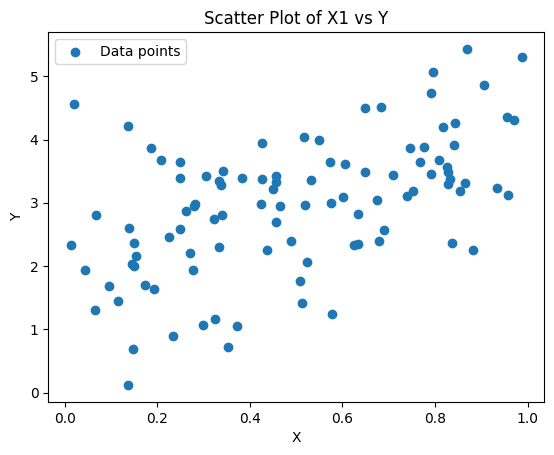

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           7.43e-07
Time:                        09:42:47   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.0

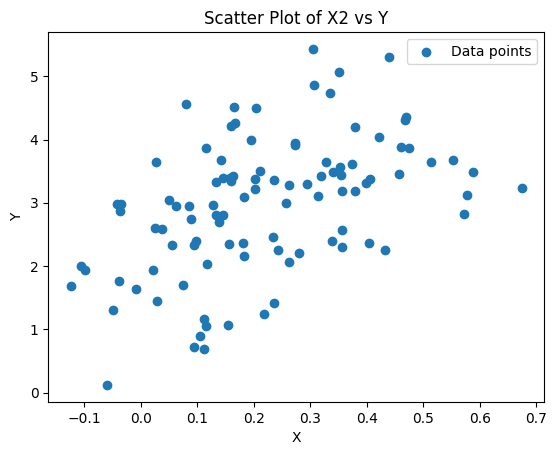

In [22]:
model1 = fit_model('Y ~ X1 + X2', data1)
print(model1.summary())

model2 = fit_model('Y ~ X1', data1)
print(model2.summary())
plot_results(data1['X1'], data1['Y'], 'Scatter Plot of X1 vs Y')

model3 = fit_model('Y ~ X2', data1)
print(model3.summary())
plot_results(data1['X2'], data1['Y'], 'Scatter Plot of X2 vs Y')

X1 and X2 correlation: 0.6789150824876988


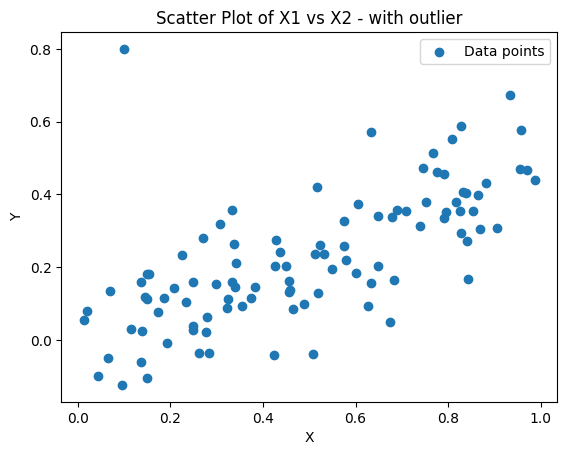

In [23]:
data2 = pd.DataFrame({
    'X1': np.concatenate([data1['X1'] , [0.1]]), 
    'X2': np.concatenate([data1['X2'] , [0.8]]), 
    'Y': np.concatenate([data1['Y'], [6]])
})

print("X1 and X2 correlation:", data2['X1'].corr(data2['X2']))
plot_results(data2['X1'], data2['X2'], 'Scatter Plot of X1 vs X2 - with outlier')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           4.60e-08
Time:                        09:42:48   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.0

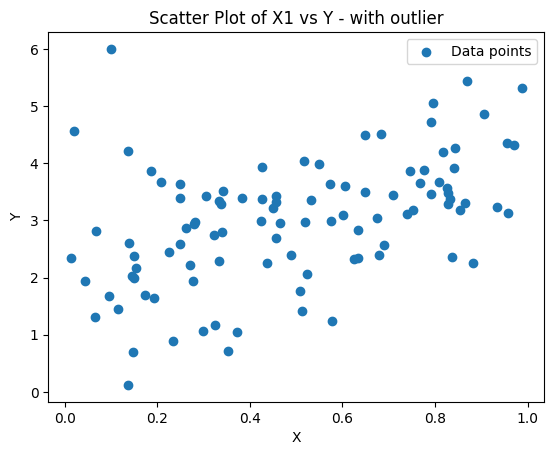

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           3.13e-08
Time:                        09:42:48   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.0

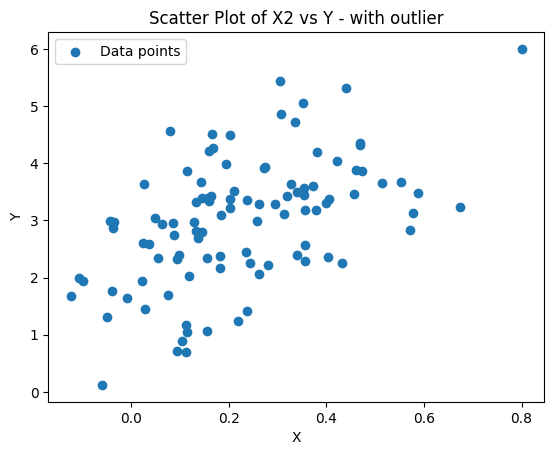

In [24]:
model4 = fit_model('Y ~ X1 + X2', data2)
print(model4.summary())

model5 = fit_model('Y ~ X1', data2)
print(model5.summary())
plot_results(data2['X1'], data2['Y'], 'Scatter Plot of X1 vs Y - with outlier')

model6 = fit_model('Y ~ X2', data2)
print(model6.summary())
plot_results(data2['X2'], data2['Y'], 'Scatter Plot of X2 vs Y - with outlier')